# App user segmentation is the task of grouping users based on how they engage with the app. It helps find retained users, find the user segment for a marketing campaign, and solve many other business problems where you need to search for users based on similar characteristics.


In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv("userbehaviour.csv")
df.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed


In [4]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import pandas as pd
pio.templates.default = "plotly_white"

# Let's start by looking at the highest, lowest, and average screen time of all the users:

In [9]:
print(f'Average Screen Time = {df["Average Screen Time"].mean()}')
print(f'Highest Screen Time = {df["Average Screen Time"].max()}')
print(f'Lowest Screen Time = {df["Average Screen Time"].min()}')

Average Screen Time = 24.39039039039039
Highest Screen Time = 50.0
Lowest Screen Time = 0.0


# Now let's have a look at the highest, lowest, and the average amount spent by all the users:

In [10]:
print(f'Average Spend of the Users = {df["Average Spent on App (INR)"].mean()}')
print(f'Highest Spend of the Users = {df["Average Spent on App (INR)"].max()}')
print(f'Lowest Spend of the Users = {df["Average Spent on App (INR)"].min()}')

Average Spend of the Users = 424.4154154154154
Highest Spend of the Users = 998.0
Lowest Spend of the Users = 0.0


# Now let's have a look at the relationship between the spending capacity and screen time of the active users and the users who have uninstalled the app:

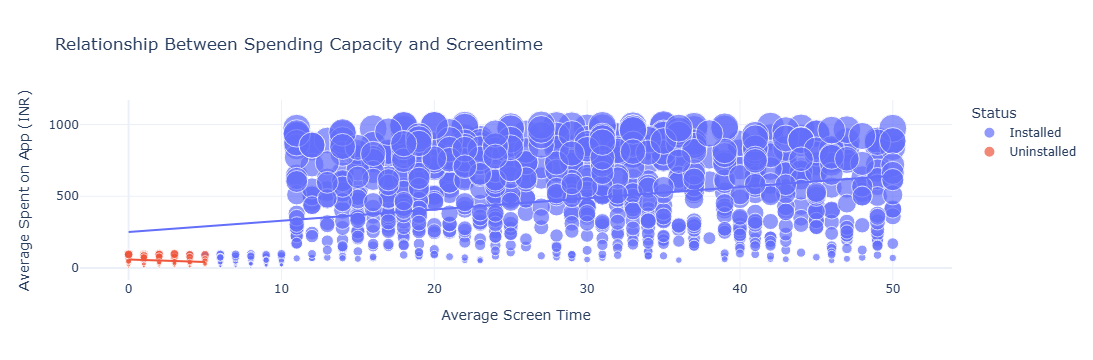

In [17]:
figure = px.scatter(data_frame = df,
                    x="Average Screen Time",
                    y="Average Spent on App (INR)",
                    size="Average Spent on App (INR)",
                    color= "Status",
                    title = "Relationship Between Spending Capacity and Screentime",
                    trendline="ols")

figure.show()

# So this is great! Users who uninstalled the app had an average screen time of fewer than 5 minutes a day, and the average spent was less than 100. We can also see a linear relationship between the average screen time and the average spending of the users still using the app.

# Now let's have a look at the relationship between the ratings given by users and the average screen time:


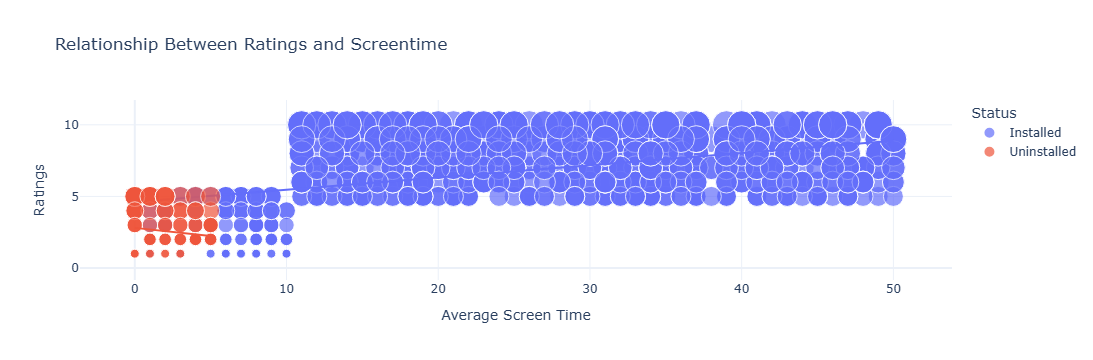

In [18]:
figure = px.scatter(data_frame = df,
                    x="Average Screen Time",
                    y="Ratings",
                    size="Ratings",
                    color= "Status",
                    title = "Relationship Between Ratings and Screentime",
                    trendline="ols")

figure.show()

# App User Segmentation to Find Retained and Lost Users

In [21]:
 clustering_data = df[["Average Screen Time", "Left Review",
                        "Ratings", "Last Visited Minutes",
                        "Average Spent on App (INR)",
                        "New Password Request"]]

In [25]:
from sklearn.preprocessing import MinMaxScaler
for i in clustering_data.columns:
    MinMaxScaler(i)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(clustering_data)
df["Segments"] = clusters

print(df.head(10))

   userid  Average Screen Time  Average Spent on App (INR)  Left Review  \
0    1001                 17.0                       634.0            1   
1    1002                  0.0                        54.0            0   
2    1003                 37.0                       207.0            0   
3    1004                 32.0                       445.0            1   
4    1005                 45.0                       427.0            1   
5    1006                 28.0                       599.0            0   
6    1007                 49.0                       887.0            1   
7    1008                  8.0                        31.0            0   
8    1009                 28.0                       741.0            1   
9    1010                 28.0                       524.0            1   

   Ratings  New Password Request  Last Visited Minutes       Status  Segments  
0        9                     7                  2990    Installed         0  
1        4    

In [26]:
print(df["Segments"].value_counts()) 

Segments
0    910
1     45
2     44
Name: count, dtype: int64


# Now let's rename the segments for a better understanding:

In [27]:
df["Segments"]= df["Segments"].map({0: "Retained",1:
            "Churn", 2:"Needs Attention"})

In [28]:
df.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Segments
0,1001,17.0,634.0,1,9,7,2990,Installed,Retained
1,1002,0.0,54.0,0,4,8,24008,Uninstalled,Needs Attention
2,1003,37.0,207.0,0,8,5,971,Installed,Retained
3,1004,32.0,445.0,1,6,2,799,Installed,Retained
4,1005,45.0,427.0,1,5,6,3668,Installed,Retained


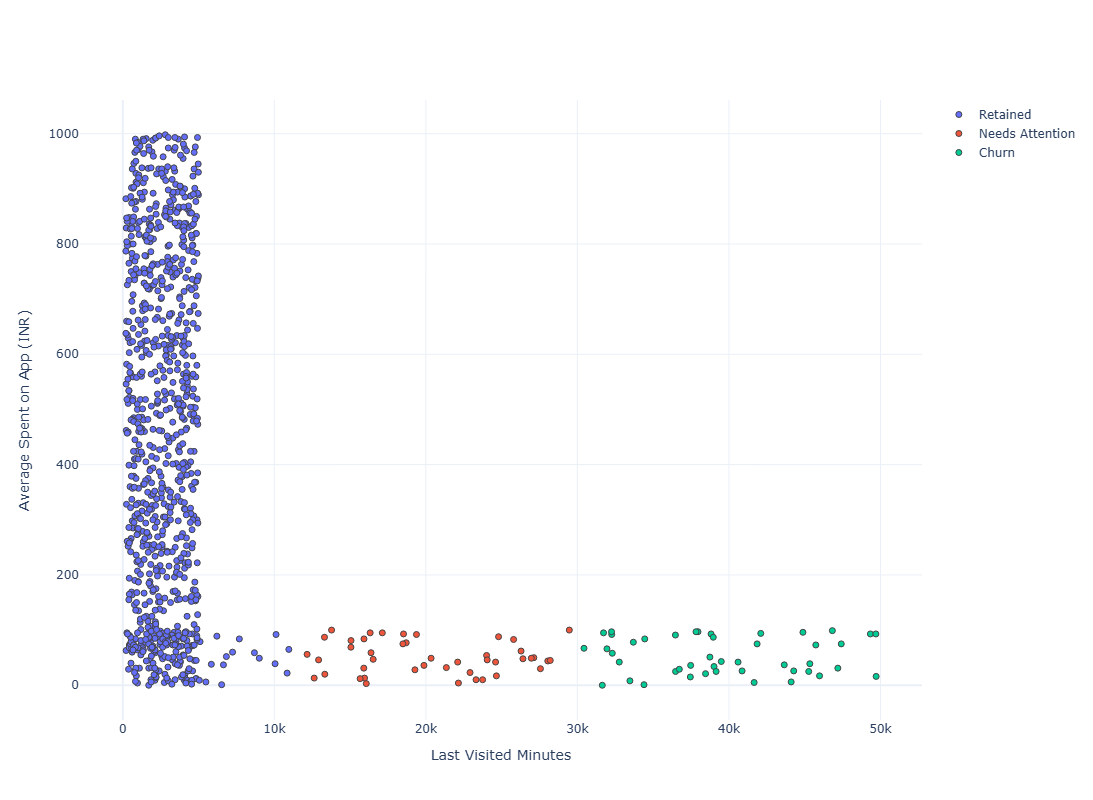

In [30]:
PLOT = go.Figure()
for i in list (df["Segments"].unique()):

    PLOT.add_trace(go.Scatter(x =df[df["Segments"] == i]['Last Visited Minutes' ],
                                y = df[df["Segments"] == i]['Average Spent on App (INR)'],
                                mode = 'markers', marker_size = 6, marker_line_width = 1,
                                name = str(i)))
    
PLOT.update_traces(hovertemplate='Last Visited Minutes: %{x} <br>Average Spent on App (INR): %{y}' )

PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                    yaxis_title = 'Average Spent on App (INR)',
                    xaxis_title = 'Last Visited Minutes',
                    scene = dict(xaxis=dict(title = 'Last Visited Minutes', title_font_color = 'black'),
                                yaxis=dict(title = 'Average Spent on App (INR)',
                                title_font_color = 'black')))

